In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
%matplotlib inline
# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
# NLTK Stop words (insert the stop words you prefer or you can use the list uploaded under the file name: function-ar)

mylist= [...]

from nltk.corpus import stopwords
stop_words = mylist

In [3]:
df = pd.read_csv(r'C:\\Users\\snmuj\\Documents\\TopicModelling_Man-Woman\\LDATopicModelling-main\\W_A.csv')
df = df.head(4786)
df.dropna()
print(df.Score.unique())
df.head()

[1]


,Id,Score,Text
0,1,1,كتابته عن المرأة واللغة نموذجاً لتوضيح كتاب ال...
1,2,1,بالاضافة الى ذلك تحتاج المرأة وخاصة الشابة وال...
2,3,1,الجماع لشكوى المرأة وايضا لشكوى الرجل
3,4,1,بين المرأة المسلمة والمرأة في أوروبا
4,5,1,الأجنبيات ومحاولة استمالة المرأة لفعل


In [4]:
# Convert to list
data = df.Text.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['كتابته عن المرأة واللغة نموذجاً لتوضيح كتاب المرأة واللغة م ثالثاً ومما '
 'شرارة كتاب ثقافة الوهم مقاربات حول المرأة المرأة في الذهن العربي فوجدها '
 'مختزلة في صوت المرأة الموت الوأد بكل اشكاله في سياق المحارم وصورة المرأة '
 'الحياة الجسد من خلال ثلاث قصائد هي المرأة الموت لمقولة المرأة بين الزوج '
 'والقوز الى حد لكن تبقى المرأة في النصوص الثلاثة ذات المرأة التي اصبحت لؤلؤة '
 'مكنوزة لاحول لها']


In [5]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=False))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['كتابته', 'عن', 'المرأة', 'واللغة', 'نموذجا', 'لتوضيح', 'كتاب', 'المرأة', 'واللغة', 'ثالثا', 'ومما', 'شرارة', 'كتاب', 'ثقافة', 'الوهم', 'مقاربات', 'حول', 'المرأة', 'المرأة', 'في', 'الذهن', 'العربي', 'فوجدها', 'مختزلة', 'في', 'صوت', 'المرأة', 'الموت', 'الوأد', 'بكل', 'اشكاله', 'في', 'سياق', 'المحارم', 'وصورة', 'المرأة', 'الحياة', 'الجسد', 'من', 'خلال', 'ثلاث', 'قصائد', 'هي', 'المرأة', 'الموت', 'لمقولة', 'المرأة', 'بين', 'الزوج', 'والقوز', 'الى', 'حد', 'لكن', 'تبقى', 'المرأة', 'في', 'النصوص', 'الثلاثة', 'ذات', 'المرأة', 'التي', 'اصبحت', 'لؤلؤة', 'مكنوزة', 'لاحول', 'لها']]


In [6]:

# Build the bigram and trigram models
# bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
# trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
# print(trigram_mod[bigram_mod[data_words[0]]])

In [7]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in mylist] for doc in texts]

#def make_bigrams(texts):
   # return [bigram_mod[doc] for doc in texts]

#def make_trigrams(texts):
 #   return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [8]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
#data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en

nlp = spacy.load('xx_ent_wiki_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#print(data_lemmatized[:1])
print(data_words_nostops[:1])

C:\Users\snmuj\anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'xx_ent_wiki_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


[['كتابته', 'واللغة', 'نموذجا', 'لتوضيح', 'كتاب', 'واللغة', 'ثالثا', 'شرارة', 'كتاب', 'ثقافة', 'الوهم', 'مقاربات', 'الذهن', 'العربي', 'فوجدها', 'مختزلة', 'صوت', 'الموت', 'الوأد', 'اشكاله', 'سياق', 'المحارم', 'وصورة', 'الحياة', 'الجسد', 'ثلاث', 'قصائد', 'الموت', 'لمقولة', 'الزوج', 'والقوز', 'حد', 'تبقى', 'النصوص', 'الثلاثة', 'اصبحت', 'لؤلؤة', 'مكنوزة', 'لاحول']]


In [9]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_nostops)

# Create Corpus
texts = data_words_nostops

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1)]]


In [10]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:4]]

[[('اشكاله', 1),
  ('اصبحت', 1),
  ('الثلاثة', 1),
  ('الجسد', 1),
  ('الحياة', 1),
  ('الذهن', 1),
  ('الزوج', 1),
  ('العربي', 1),
  ('المحارم', 1),
  ('الموت', 2),
  ('النصوص', 1),
  ('الوأد', 1),
  ('الوهم', 1),
  ('تبقى', 1),
  ('ثالثا', 1),
  ('ثقافة', 1),
  ('ثلاث', 1),
  ('حد', 1),
  ('سياق', 1),
  ('شرارة', 1),
  ('صوت', 1),
  ('فوجدها', 1),
  ('قصائد', 1),
  ('كتاب', 2),
  ('كتابته', 1),
  ('لؤلؤة', 1),
  ('لاحول', 1),
  ('لتوضيح', 1),
  ('لمقولة', 1),
  ('مختزلة', 1),
  ('مقاربات', 1),
  ('مكنوزة', 1),
  ('نموذجا', 1),
  ('والقوز', 1),
  ('واللغة', 2),
  ('وصورة', 1)],
 [('الامر', 1),
  ('الشابة', 1),
  ('بالاضافة', 1),
  ('تتجاوب', 1),
  ('تحتاج', 1),
  ('نبض', 1),
  ('واضطلاع', 1),
  ('والارضية', 1),
  ('والوزارة', 1)],
 [('الجماع', 1), ('لشكوى', 2), ('وايضا', 1)],
 [('أوروبا', 1), ('المسلمة', 1)]]

In [11]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=50,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.1,
                                           eta=0.01,
                                           per_word_topics=True)

In [12]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
#print("$")
doc_lda = lda_model[corpus]

[(0, '0.123*"العمل" + 0.093*"اكثر" + 0.080*"عمل" + 0.073*"الإسلام" + 0.064*"خصوصا" + 0.062*"واحدة" + 0.060*"نفس" + 0.057*"للمرأة" + 0.039*"خارج" + 0.017*"نظر"'), (1, '0.124*"المسلمة" + 0.113*"المجتمع" + 0.049*"تحرير" + 0.044*"رئيس" + 0.042*"حق" + 0.042*"الآن" + 0.040*"تعاني" + 0.030*"تشارك" + 0.028*"العاملة" + 0.027*"تكن"'), (2, '0.088*"اما" + 0.083*"البعض" + 0.082*"حالة" + 0.063*"الحياة" + 0.063*"العمر" + 0.048*"سؤال" + 0.037*"تمثل" + 0.031*"المنزل" + 0.026*"اجتماعية" + 0.026*"ذكر"'), (3, '0.094*"جدا" + 0.067*"الطبيب" + 0.049*"علاج" + 0.047*"لابد" + 0.046*"دائما" + 0.036*"جمال" + 0.031*"رأي" + 0.031*"مكانة" + 0.029*"فقال" + 0.029*"صورة"'), (4, '0.071*"تظهر" + 0.052*"سواء" + 0.039*"الأخرى" + 0.038*"وبالتالي" + 0.031*"مختلف" + 0.029*"الاجتماعية" + 0.029*"عدة" + 0.027*"الخاصة" + 0.027*"يجعل" + 0.027*"الغربية"'), (5, '0.190*"سن" + 0.156*"خاصة" + 0.118*"النسائية" + 0.064*"تبدأ" + 0.038*"للرجل" + 0.033*"بدأت" + 0.031*"وعدم" + 0.029*"حقوقها" + 0.022*"بيتها" + 0.017*"نسائية"'), (6, '0.051*"أص

In [13]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_nostops, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -98.01989319599343

Coherence Score:  0.5669789233421696


In [14]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='tsne')
vis

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      32.420952   8.115230       1        1  12.511344
4       0.648955  71.707100       2        1  12.481573
6      71.019684   9.971006       3        1  10.855486
9       3.785981  33.185135       4        1  10.634500
0     -42.666500  -9.222070       5        1  10.001165
8      -3.621689 -43.526516       6        1   9.801998
3      -3.632402  -4.171708       7        1   9.319933
2     -36.584400  35.804413       8        1   9.021854
5      44.391380  50.615383       9        1   8.187907
7      40.235809 -31.591665      10        1   7.184237, topic_info=         Term       Freq       Total Category  logprob  loglift
1051       سن  976.00000  976.000000  Default  30.0000  30.0000
49    المسلمة  970.00000  970.000000  Default  29.0000  29.0000
703      خاصة  802.00000  802.000000  Default  28.0000  28.0000
620   المجتمع  887.00000  887.000000  Default  27.0000  27.0000
824     العمل  774.00000  774.000000  Default  26.0000  26.0000
...       ...        ...         ...      ...      ...      ...
7511   بطريقة    0.10885    0.803127  Topic10 -10.6303   0.6347
7512     تطيع    0.10885    0.803127  Topic10 -10.6303   0.6347
7506   احتفاظ    0.10885    0.803127  Topic10 -10.6303   0.6347
7509   بالقطة    0.10885    0.803127  Topic10 -10.6303   0.6347
7508  بالأحرى    0.10885    0.803127  Topic10 -10.6303   0.6347

[370 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
739       3  0.998699  أصبحت
574       8  0.902395   أكون
277      10  0.897123  أهلها
472       1  0.997128  أهمية
253      10  0.885562   أولى
...     ...       ...    ...
1061      4  0.994233   يزيد
184       3  0.995596    يصل
245      10  0.997342  يعاني
73        8  0.992696   يعني
378       7  0.996518  ينبغي

[260 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 7, 10, 1, 9, 4, 3, 6, 8])

import os
os.environ.update({'MALLET_HOME':r'C:\\Users\\snmuj\\AppData\\Local\\Temp\\mallet-2.0.8'})
mallet_path = 'C:\\Users\\snmuj\\AppData\\Local\\Temp\\mallet-2.0.8\\bin\\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=50, id2word=id2word)

In [15]:
import os
from gensim.models.wrappers import LdaMallet
os.environ.update({'MALLET_HOME':r'C:\\mallet\\mallet-2.0.8'})
mallet_path = 'C:\\mallet\\mallet-2.0.8\\bin\\mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

#result = (ldamallet.show_topics(num_topics=10, num_words=10,formatted=False))
#for each in result:
#    print (each)

In [16]:
# Show Topics
#print(ldamallet.show_topics(formatted=True))
print(ldamallet.show_topics(10))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words_nostops, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

# Compute Coherence Score using UMass
#coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words_nostops, dictionary=id2word, coherence="u_mass")
#coherence_ldamallet = coherence_model_ldamallet.get_coherence()
#print('\nCoherence Score: ', coherence_ldamallet)

[(0, '0.014*"الحامل" + 0.009*"الولادة" + 0.009*"اما" + 0.008*"البعض" + 0.007*"الآخر" + 0.006*"الأم" + 0.005*"آلام" + 0.005*"وعدم" + 0.005*"يرى" + 0.005*"نساء"'), (1, '0.039*"المسلمة" + 0.012*"حقوق" + 0.011*"عزيزتي" + 0.011*"الإسلام" + 0.009*"تحرير" + 0.007*"الاسلام" + 0.007*"عنوان" + 0.006*"قضية" + 0.005*"مكان" + 0.005*"رئيس"'), (2, '0.016*"والأطفال" + 0.013*"الحياة" + 0.009*"الزواج" + 0.008*"العالم" + 0.006*"للرجل" + 0.006*"وادي" + 0.006*"التدخين" + 0.006*"فتنة" + 0.006*"أمر" + 0.005*"الصالحة"'), (3, '0.024*"المجتمع" + 0.020*"دور" + 0.015*"تعليم" + 0.014*"العمل" + 0.012*"للمرأة" + 0.008*"النسائية" + 0.007*"التعليم" + 0.007*"نصف" + 0.007*"مجتمعنا" + 0.007*"معظم"'), (4, '0.011*"اكثر" + 0.010*"حق" + 0.009*"الناس" + 0.007*"الشيخ" + 0.007*"القرآن" + 0.006*"زيادة" + 0.006*"ظاهرة" + 0.006*"كتاب" + 0.006*"كثيرة" + 0.005*"الكريم"'), (5, '0.018*"عمل" + 0.009*"سواء" + 0.007*"والاطفال" + 0.007*"العاملة" + 0.007*"قضايا" + 0.007*"السعوديات" + 0.006*"تقول" + 0.006*"وضع" + 0.006*"دائما" + 0.006*"الاج

In [17]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_nostops, start=2,limit=50, step=6)

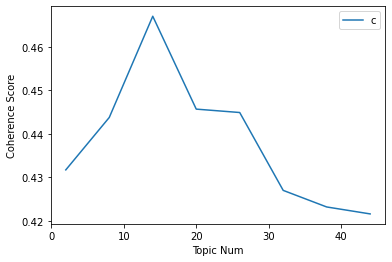

In [19]:
import matplotlib 
#matplotlib.rc('xtick', labelsize=12) 
#matplotlib.rc('ytick', labelsize=12)

#font = {'family' : 'sakkal majalla',
#        'weight' : 'normal',
#        'size'   : 16}

#matplotlib.rc('font', **font)
#from arabic_reshaper import arabic_reshaper
#from bidi.algorithm import get_display
#from matplotlib import pyplot as plt
#def f(x):
#    out=get_display( arabic_reshaper.reshape(x))
#    return(out)
# Show graph
limit=50; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel(("Topic Num"), alpha = 1)
plt.ylabel(("Coherence Score"), alpha = 1)
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4317
Num Topics = 8  has Coherence Value of 0.4438
Num Topics = 14  has Coherence Value of 0.4671
Num Topics = 20  has Coherence Value of 0.4457
Num Topics = 26  has Coherence Value of 0.4449
Num Topics = 32  has Coherence Value of 0.427
Num Topics = 38  has Coherence Value of 0.4232
Num Topics = 44  has Coherence Value of 0.4216


In [21]:
# Select the model and print the topics
optimal_model = model_list[5]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(17,
  '0.032*"سن" + 0.019*"معظم" + 0.016*"مستوى" + 0.013*"اليأس" + 0.013*"مجموعة" + 0.010*"تقوم" + 0.009*"ابن" + 0.009*"يعني" + 0.008*"الإياس" + 0.008*"الأعمال"'),
 (9,
  '0.023*"الدعوة" + 0.022*"الشيخ" + 0.019*"الداعية" + 0.017*"صورة" + 0.014*"الإسلامية" + 0.014*"أوساط" + 0.010*"ضرورة" + 0.009*"البرامج" + 0.009*"خاص" + 0.008*"ينبغي"'),
 (19,
  '0.036*"عزيزتي" + 0.017*"عنوان" + 0.015*"موضوع" + 0.014*"العدد" + 0.013*"قرأت" + 0.012*"الموضوع" + 0.011*"رئيس" + 0.011*"الكاتبة" + 0.011*"سعادة" + 0.010*"رقم"'),
 (20,
  '0.026*"نسبة" + 0.021*"الشباب" + 0.019*"مشاركة" + 0.014*"تقوم" + 0.013*"ضعف" + 0.011*"بلغت" + 0.010*"آخر" + 0.010*"الطلاق" + 0.010*"الأخرى" + 0.009*"معشر"'),
 (26,
  '0.044*"الشعر" + 0.020*"زيادة" + 0.018*"العديد" + 0.015*"تساقط" + 0.013*"حياة" + 0.013*"الطبيب" + 0.013*"للمرأة" + 0.012*"خصوصا" + 0.012*"يعد" + 0.011*"وبالتالي"'),
 (23,
  '0.024*"الأطفال" + 0.015*"شخصية" + 0.014*"حب" + 0.012*"تجاه" + 0.012*"الإنسان" + 0.012*"تقدم" + 0.008*"شقائق" + 0.008*"الخليجية" + 0.008*"الج

In [22]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,29.0,0.4033,"والاطفال, القرآن, كتاب, الكريم, واللغة, حد, بي...",كتابته عن المرأة واللغة نموذجاً لتوضيح كتاب ال...
1,1,23.0,0.0453,"الأطفال, شخصية, حب, تجاه, الإنسان, تقدم, شقائق...",بالاضافة الى ذلك تحتاج المرأة وخاصة الشابة وال...
2,2,13.0,0.0763,"خاصة, الحوامل, آلام, غالبا, الولادة, تظهر, وال...",الجماع لشكوى المرأة وايضا لشكوى الرجل
3,3,18.0,0.0493,"المسلمة, الإسلام, حقوق, تحرير, الاسلام, ضد, قض...",بين المرأة المسلمة والمرأة في أوروبا
4,4,17.0,0.0495,"سن, معظم, مستوى, اليأس, مجموعة, تقوم, ابن, يعن...",الأجنبيات ومحاولة استمالة المرأة لفعل
5,5,19.0,0.0446,"عزيزتي, عنوان, موضوع, العدد, قرأت, الموضوع, رئ...",على غياب المرأة الكاتبة لأنها امرأة المرأة وفو...
6,6,21.0,0.0856,"اكثر, وادي, تكن, للرجل, ذكر, بلا, علم, حالات, ...",حضور المرأة في قصة حالة إغماء ذكر الدكتور القص...
7,7,6.0,0.0609,"وعدم, تقول, أمر, وسط, المبدعة, الوعي, رأي, بأن...",عندي الكتابة على لسان المرأة واعتقد أن هذا
8,8,10.0,0.0917,"وضع, يخص, وجدت, كتابة, يوجد, الجميع, مدينة, مر...",النسائية بدأت المرأة العربية بداية الكتابة تحد...
9,9,17.0,0.0506,"سن, معظم, مستوى, اليأس, مجموعة, تقوم, ابن, يعن...",ملما بأسعار السكن فقالت المرأة البدينة


In [23]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.4780,"الناس, ترى, السر, كشف, البيت, تأتي, حينما, جدا...",سري ترى ما السر في تسمية أغلب أخواننا السودا...
1,1.0,0.3831,"والأطفال, فتنة, كبيرة, بالرجال, السن, محرم, نص...",الانزلاق الغضروفي للعمود الفقري يصيب الرجال أك...
2,2.0,0.4683,"الاجتماعية, الآن, مجتمعنا, كثيرة, وصلت, زوجة, ...",لكمات في قلب زوجة شعر مشوح المشوح سافر عنها زو...
3,3.0,0.4155,"المجتمع, مجال, العاملات, السعوديات, نصف, الدول...",اضاءة والقول بأن المرأة هي المجتمع كله يعني أن...
4,4.0,0.4816,"الثدي, سرطان, حالة, الحياة, الوطن, بسرطان, احد...",إلى جنة الخلد يا لطيفة هكذا هي الحياة اجتماع و...


In [24]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,29.0,"والاطفال, القرآن, كتاب, الكريم, واللغة, حد, بي...",157.0,0.0328
1.0,23.0,"الأطفال, شخصية, حب, تجاه, الإنسان, تقدم, شقائق...",214.0,0.0447
2.0,13.0,"خاصة, الحوامل, آلام, غالبا, الولادة, تظهر, وال...",167.0,0.0349
3.0,18.0,"المسلمة, الإسلام, حقوق, تحرير, الاسلام, ضد, قض...",180.0,0.0376
4.0,17.0,"سن, معظم, مستوى, اليأس, مجموعة, تقوم, ابن, يعن...",133.0,0.0278
...,...,...,...,...
4781.0,18.0,"المسلمة, الإسلام, حقوق, تحرير, الاسلام, ضد, قض...",NaN,NaN
4782.0,8.0,"المبكر, سواء, المجتمعات, الأولى, الواقع, الماض...",NaN,NaN
4783.0,18.0,"المسلمة, الإسلام, حقوق, تحرير, الاسلام, ضد, قض...",NaN,NaN
4784.0,9.0,"الدعوة, الشيخ, الداعية, صورة, الإسلامية, أوساط...",NaN,NaN
